<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/Salary_Data.csv")

In [ ]:
df.shape

(6704, 6)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(1792, 6)

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# For categorical columns → replace NaN with the most frequent value (mode)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)



/tmp/ipython-input-583963846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-583963846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
le = LabelEncoder()
for col in ['Gender', 'Education Level', 'Job Title']:
    df[col] = le.fit_transform(df[col])
# Scale numerical columns
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(
    df[['Age', 'Years of Experience', 'Salary']]
)
# Show first 5 rows
print(df.head())


        Age  Gender  Education Level  Job Title  Years of Experience    Salary
0 -0.381283       1                0        177            -0.607616 -0.449948
1 -0.868792       0                3         18            -0.900266 -0.935281
2  1.203121       1                5        145             0.855633  0.714851
3  0.106226       0                0        116            -0.314966 -1.032348
4  2.056261       1                3         26             1.587258  1.685517


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Salary changes by 0.82 units for each additional year of experience.
Regression equation: Salary = -0.00 + 0.82 * YearsExperience


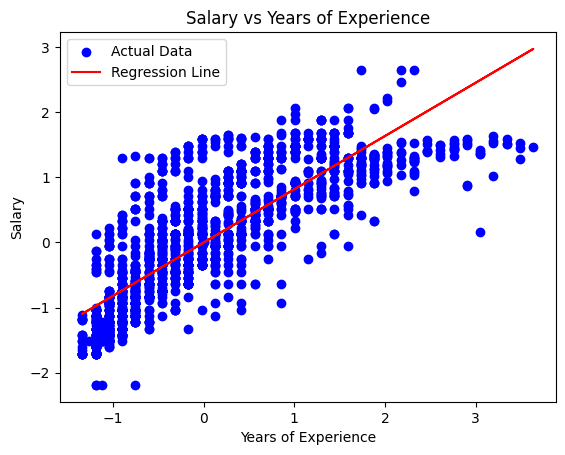

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = df[['Years of Experience']]
y = df['Salary']
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Salary changes by {slope:.2f} units for each additional year of experience.")
print(f"Regression equation: Salary = {intercept:.2f} + {slope:.2f} * YearsExperience")
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
import numpy as np


In [ ]:
df=pd.read_csv("/content/Concrete Compressive Strength.csv")

In [ ]:
df.shape

(1030, 9)

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [ ]:
X= df[["Cement"]]
y = df["Concrete compressive strength "]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 193.14891378045667
R²: 0.25043426659116996


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


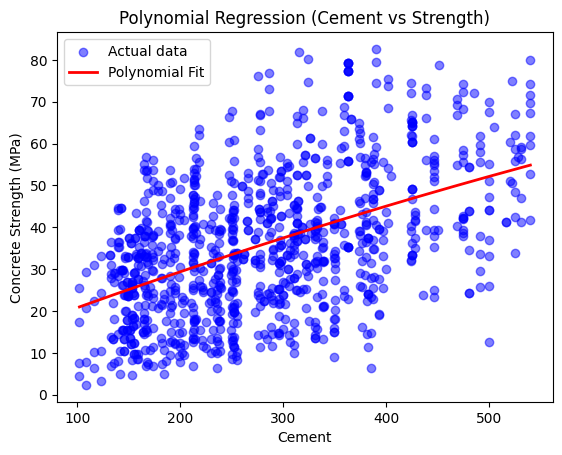

In [ ]:
plt.scatter(X["Cement"], y, color="blue", alpha=0.5, label="Actual data")
X_range = np.linspace(X["Cement"].min(), X["Cement"].max(), 200).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Polynomial Fit")
plt.xlabel("Cement")
plt.ylabel("Concrete Strength (MPa)")
plt.title("Polynomial Regression (Cement vs Strength)")
plt.legend()
plt.show()

In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)


In [ ]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

In [ ]:
print("\n--- Ridge Regression ---")
print("R² Score:", r2_score(y_test, ridge_pred))
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("MSE:", ridge_mse)


--- Ridge Regression ---
R² Score: 0.25114729451867324
MAE: 11.560347076650977
MSE: 192.9651799682584


In [ ]:
lasso = Lasso(alpha=0.1, max_iter=1000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [ ]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

In [ ]:
print("\n--- Lasso Regression ---")
print("R² Score:", r2_score(y_test, lasso_pred))
print("MAE:", mean_absolute_error(y_test, lasso_pred))
print("MSE:", lasso_mse)


--- Lasso Regression ---
R² Score: 0.2518253257466593
MAE: 11.555858856327701
MSE: 192.79046414367136


In [ ]:
print("\n--- Comparison of Models ---")
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Lasso Regression MSE: {lasso_mse:.2f}")


--- Comparison of Models ---
Linear Regression MSE: 95.98
Ridge Regression MSE: 192.97
Lasso Regression MSE: 192.79


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv("/content/diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
 [[78 21]
 [18 37]]


Confusion Matrix:
 [[78 21]
 [18 37]]


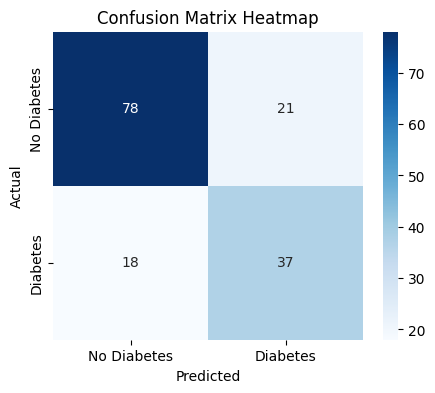

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("\n Confusion Matrix:\n", cm)
# Manual calculations
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print("\n Manual Evaluation (from Confusion Matrix)")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")


 Confusion Matrix:
 [[78 21]
 [18 37]]

 Manual Evaluation (from Confusion Matrix)
Accuracy  : 0.7468
Precision : 0.6379
Recall    : 0.6727
F1 Score  : 0.6549


In [ ]:
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f"10-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

10-Fold CV Accuracy: 0.7735 ± 0.0357
